# Analysis of Household Electric Power Consumption data

##### Date:
###### The date of the measurement in dd/mm/yyyy format. Useful for analyzing trends over time.
##### Time:
###### The time of the measurement in hh:mm:ss format. Can help in examining daily patterns or peak usage times.
##### Global_active_power:
###### Total active power consumed by the household represents the main power consumption (in kilowatts).
##### Global_reactive_power:
###### Reactive power consumed is related to energy stored in the system and returned back (in kilowatts). Useful for understanding the efficiency of energy usage.
##### Voltage:
###### Voltage (in volts) recorded at each measurement and indicate electrical health or issues.
##### Global_intensity:
###### Total current intensity (in amperes) drawn by the household.
##### Sub_metering_1:
###### Power consumption (in watt-hours) for a specific area, typically the kitchen .
##### Sub_metering_2:
###### Power consumption (in watt-hours) for another specific area, usually laundry or appliances.
##### Sub_metering_3:
###### Power consumption (in watt-hours) for heating or cooling .

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [13]:
def load_data(file_path):
    """
    Loads the data from a CSV file.
    """
    # Read the data with `;` as separator
    data = pd.read_csv(file_path, delimiter=';', low_memory=False)
    return data

In [14]:
data = load_data("./household_power_consumption.txt")
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Convert Date and Time columns into a single DateTime column:

In [15]:
def parse_datetime(data):
    """
    Combines Date and Time columns into a single DateTime column
    and sets it as the index.
    """
    data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
    data.set_index('DateTime', inplace=True)
    #data.drop(['Date', 'Time'], axis=1, inplace=True)
    return data


## Convert the power and energy columns to numeric, handling any non-numeric values by setting them to NaN:

In [16]:
def convert_to_numeric(data):
    """
    Converts relevant columns to numeric, handling errors.
    """
    cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
    return data

## Check for missing values and handle them, filling with the mean:

In [29]:
def handle_missing_values(data):
    """
    Fills missing values with the column mean.
    """
    data.dropna(inplace=True)
    return data

## Data Summary

In [18]:
def data_summary(data):
    """
    Prints a summary of the dataset.
    """
    print("Data Summary:")
    print(data.describe())
    print("\nMissing Values:")
    print(data.isnull().sum())

## Visualize Power Consumption Over Time

In [19]:
def plot_power_consumption(data):
    """
    Plots the Global Active Power consumption over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Global_active_power'], label='Global Active Power (kW)', color='b')
    plt.title('Global Active Power Over Time')
    plt.xlabel('DateTime')
    plt.ylabel('Global Active Power (kW)')
    plt.legend()
    plt.show()


## Correlation Heatmap

In [20]:
def plot_correlation_heatmap(data):
    """
    Plots a heatmap of correlations between different attributes.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

## Daily Average Power Consumption

In [21]:
def plot_daily_average(data):
    """
    Plots daily average of Global Active Power.
    """
    daily_data = data['Global_active_power'].resample('D').mean()
    plt.figure(figsize=(12, 6))
    plt.plot(daily_data, label='Daily Average Power (kW)', color='purple')
    plt.title('Daily Average Global Active Power')
    plt.xlabel('Date')
    plt.ylabel('Global Active Power (kW)')
    plt.legend()
    plt.show()

## Daily Usage Pattern and Peak Times

In [22]:
def plot_daily_usage_pattern(data):
    """
    Plots the daily usage pattern and peak times of Global Active Power.
    """
    hourly_data = data['Global_active_power'].resample('H').mean()
    daily_pattern = hourly_data.groupby(hourly_data.index.hour).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_pattern, color='blue', marker='o', linestyle='-', label='Average Hourly Power Usage')
    plt.title('Average Daily Usage Pattern and Peak Times')
    plt.xlabel('Hour of Day')
    plt.ylabel('Global Active Power (kW)')
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid(True)
    plt.show()

## Sub-Metering Comparison

In [23]:
def plot_sub_metering_comparison(data):
    """
    Plots a comparison of the three sub-metering areas over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Sub_metering_1'], label='Sub Metering 1 (Kitchen)', color='orange')
    plt.plot(data.index, data['Sub_metering_2'], label='Sub Metering 2 (Laundry)', color='green')
    plt.plot(data.index, data['Sub_metering_3'], label='Sub Metering 3 (Heating/Cooling)', color='red')

    plt.title('Sub-Metering Comparison Over Time')
    plt.xlabel('DateTime')
    plt.ylabel('Power Consumption (Wh)')
    plt.legend()
    plt.show()


## Efficiency of Energy Usage (Global Reactive Power)

In [24]:
def plot_reactive_power(data):
    """
    Plots Global Reactive Power to analyze energy efficiency.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Global_reactive_power'], color='purple')
    plt.title('Global Reactive Power Over Time')
    plt.xlabel('DateTime')
    plt.ylabel('Global Reactive Power (kW)')
    plt.show()

## Voltage Tracking with Anomaly Detection

In [25]:
def plot_voltage_with_anomalies(data):
    """
    Plots the voltage over time and highlights anomalies.
    """
    # Calculate mean and standard deviation
    voltage_mean = data['Voltage'].mean()
    voltage_std = data['Voltage'].std()

    # Define threshold for anomalies (2 standard deviations from the mean)
    lower_bound = voltage_mean - 2 * voltage_std
    upper_bound = voltage_mean + 2 * voltage_std

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Voltage'], color='blue', label='Voltage')
    
    # Highlight anomalies
    anomalies = data[(data['Voltage'] < lower_bound) | (data['Voltage'] > upper_bound)]
    plt.scatter(anomalies.index, anomalies['Voltage'], color='red', label='Anomalies', marker='o')

    plt.axhline(voltage_mean, color='green', linestyle='--', label='Mean Voltage')
    plt.axhline(lower_bound, color='red', linestyle='--', label='Anomaly Threshold')
    plt.axhline(upper_bound, color='red', linestyle='--')
    plt.title('Voltage Over Time with Anomalies')
    plt.xlabel('DateTime')
    plt.ylabel('Voltage (V)')
    plt.legend()
    plt.show()


## Function Calls

In [30]:
#data = parse_datetime(data)
#data = convert_to_numeric(data)
data = handle_missing_values(data)

In [31]:
# Summary
data_summary(data)

Data Summary:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1

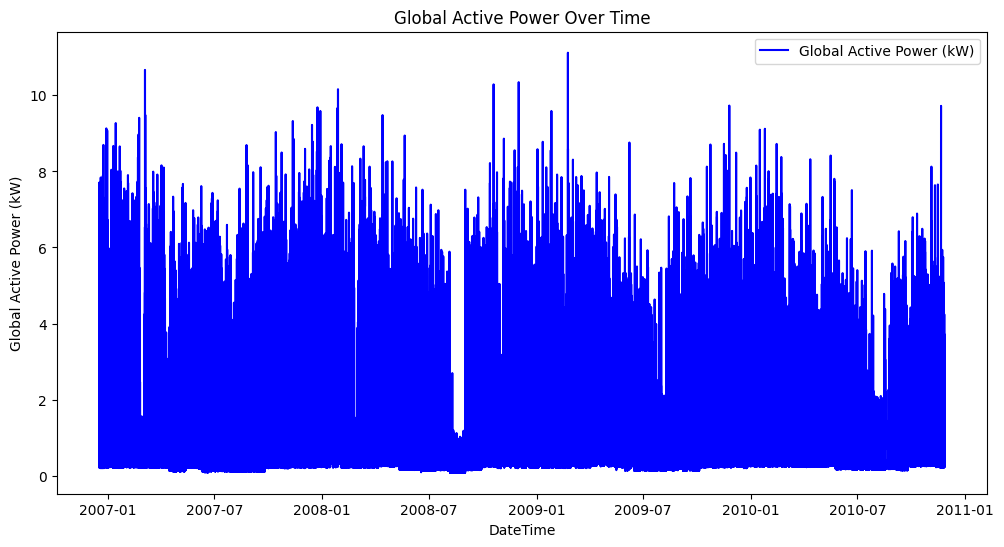

In [32]:
plot_power_consumption(data)

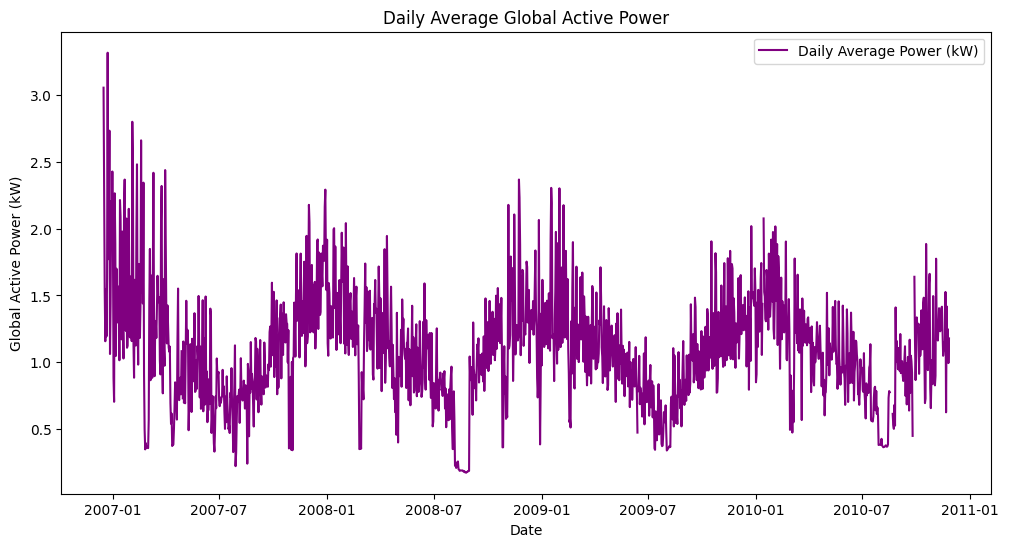

In [34]:
plot_daily_average(data)

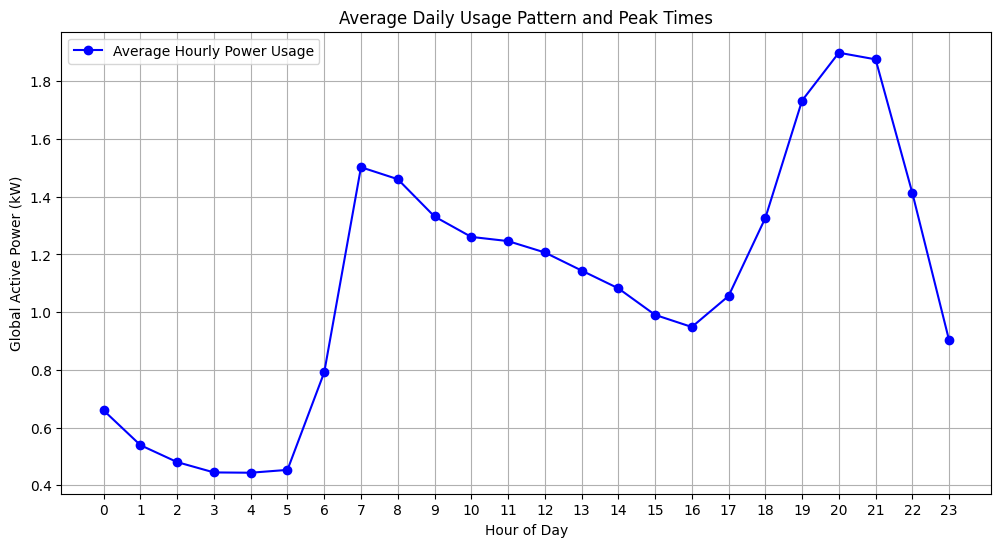

In [35]:
plot_daily_usage_pattern(data)

C:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


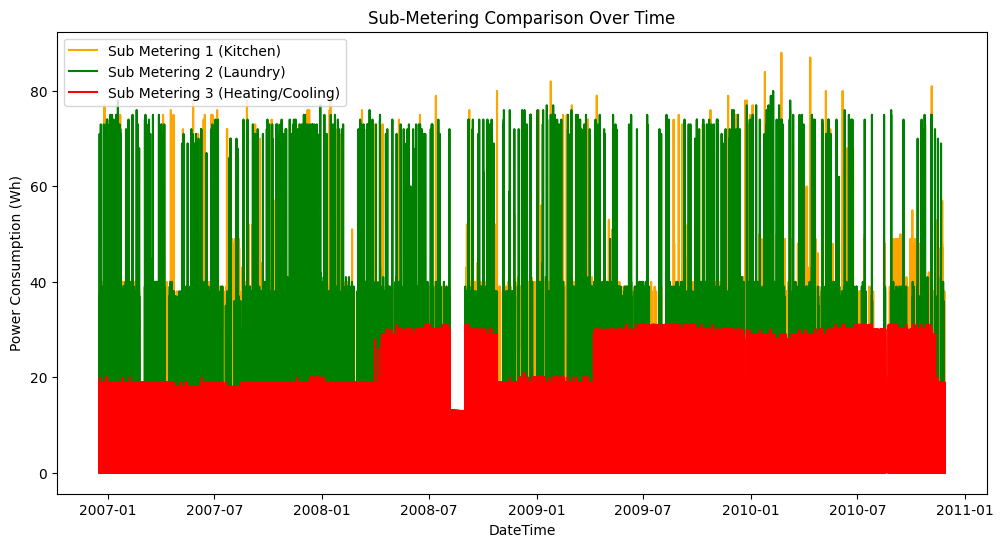

In [36]:
plot_sub_metering_comparison(data)

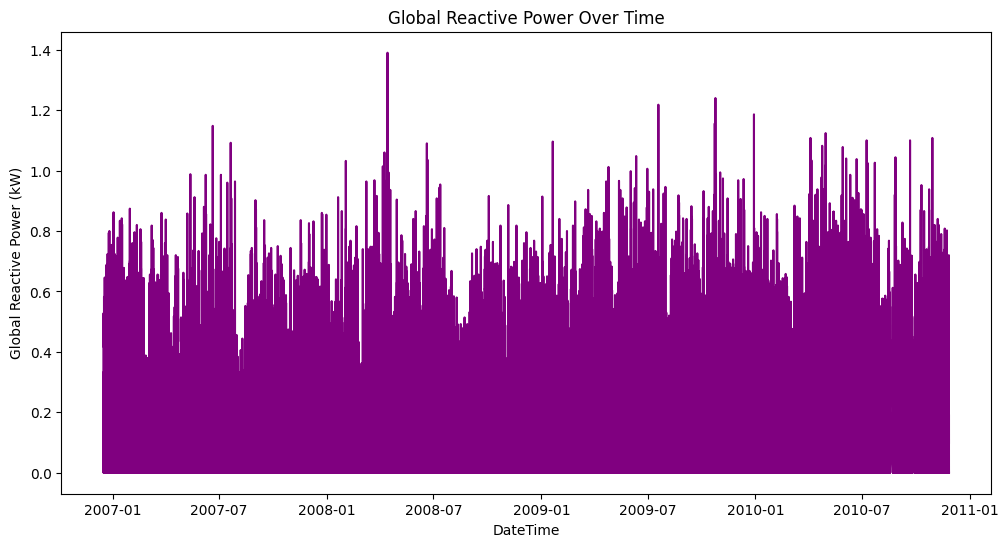

In [37]:
plot_reactive_power(data)

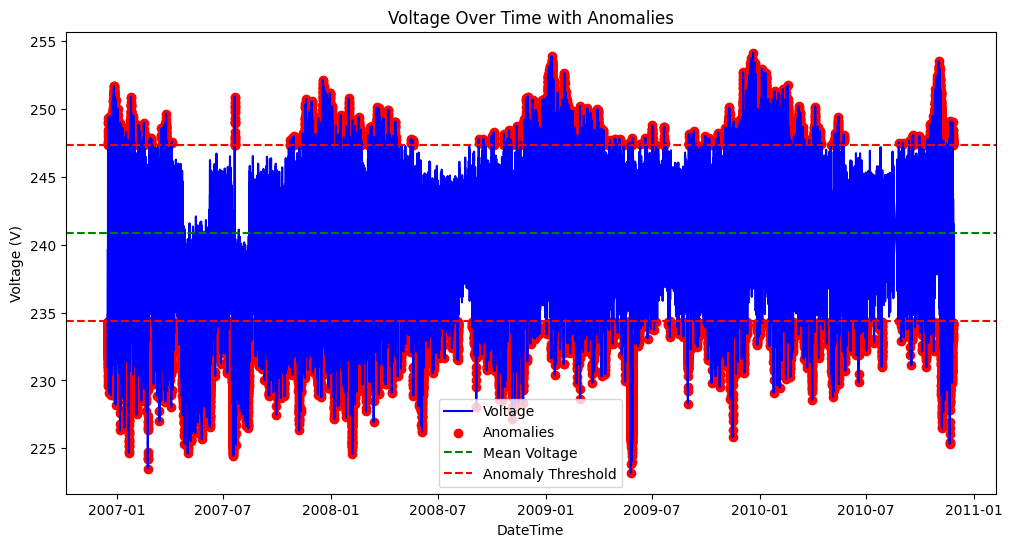

In [38]:
plot_voltage_with_anomalies(data)
